In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Image Processing with Neural Network
## Template 01

## Template with helper functions

- Moons Dataset
- Decision Boundary
- Loss curve

<img src='../../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>

## Import Statements

In [5]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
# from utils.helper import fn_plot_decision_boundary # this function is from helper.py

In [6]:
# print (fn_plot_decision_boundary.__doc__)

## Setup Global Parameters

In [8]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 20000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [9]:
def fn_plot_decision_boundary(predict, X, wts):
    
    # initialize the figure
    fig, ax = plt.subplots(figsize = (8,5));
    
    # Small increment to create object function surface
    dm = 0.01
    
    # Range of X values (First feature)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    
    # Range of Y values (Second feature)
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a grid to evaluate the object function
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # flatten and stack
    # arrays will be stacked along their last axis after being upgraded to at least 2-D 
    # with 1’s post-pended to the shape (column vectors made out of 1-D arrays)
    XX = np.c_[xx.ravel(), yy.ravel()] 

    # add another column filled with 1 to make it work with the predict function
    XX = np.hstack( ( XX, np.ones((XX.shape[0],1)) ) )
    
    # list to collect predictions
    y_pred = []
    
    # Iterate over rows
    for row in (XX):

        # a = predict(row, wts) # this is a float between [0, 1]

        y_p = predict(row, wts)
        pred = 0
        if y_p>0.5:
            pred=1
        y_pred.append(pred)
        
    Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=X[:, 2],
                                  s=20, edgecolor='k', cmap=plt.cm.bwr)
    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    ax.set_ylabel('B')
    plt.show()

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;color:red;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [11]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, noise=NOISE, shuffle=True, random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em;color:red;">
DataFrames are easier to visualize
</p>

In [13]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [15]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


<Axes: xlabel='target'>

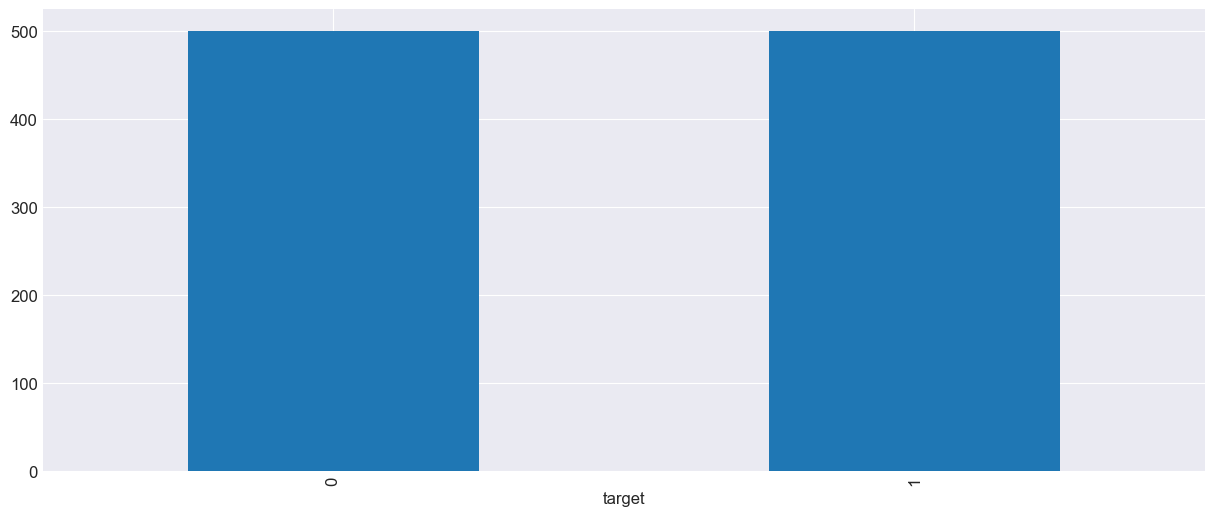

In [16]:
data_df['target'].value_counts().plot(kind='bar')

### Different ways of plotting data

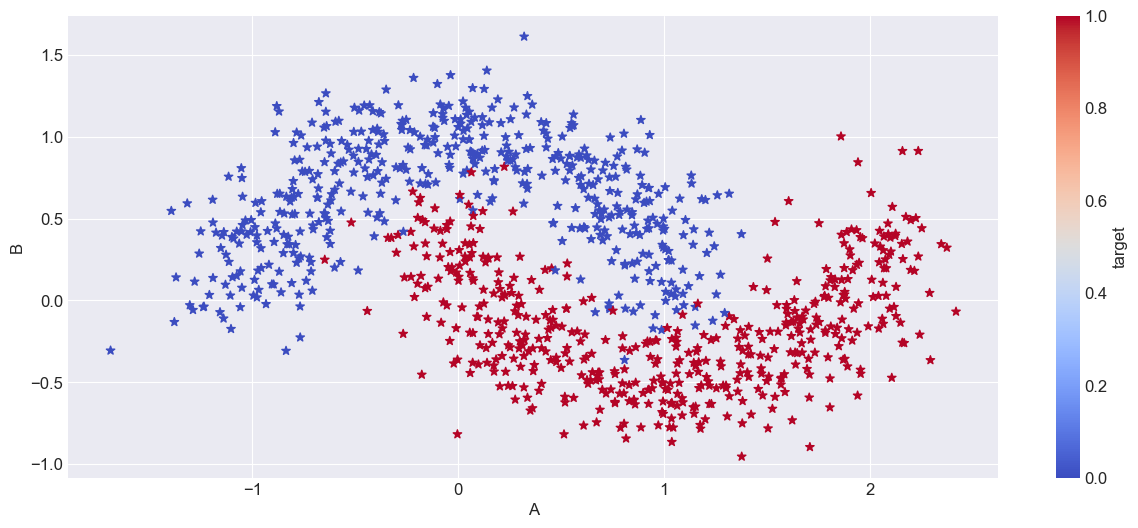

In [18]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

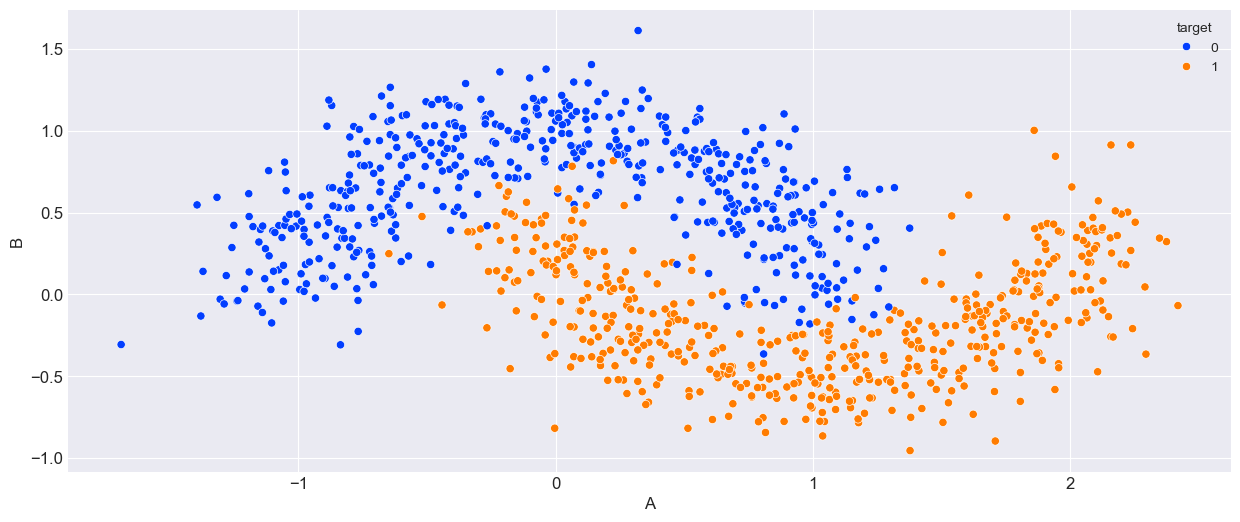

In [19]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                     hue='target'); # Color as per target column

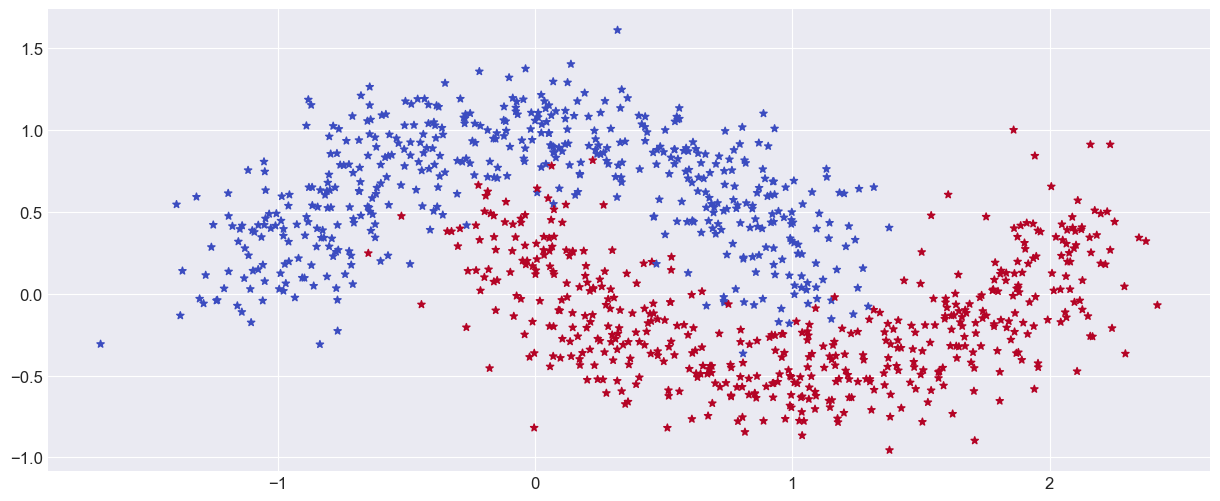

In [20]:
#### In case you want to plot X Array directly
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP);

In [21]:
# data_train = data_df[:900].to_numpy()
# data_test = data_df[900:].to_numpy()
# data_train.shape, data_test.shape

In [22]:
TEST_SIZE = 0.2
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify=y,random_state=RANDOM_STATE )

#### ONE HIDDEN LAYER
z = w0 + x1*w1 + x2*w2
z >= 0 a = 1

In [24]:
def fn_sigmoid(z):
    sig_z = 1.0 / (1 + np.exp(-z))
    return sig_z

In [25]:
fn_sigmoid(np.array([[-1., 0., 1.0],[-np.inf, 0, np.inf]]))

array([[0.26894142, 0.5       , 0.73105858],
       [0.        , 0.5       , 1.        ]])

### TanH Activation

In [27]:
def fn_actv(z):
    return np.tanh(z)

def fn_actv_prime(a):
    return 1.0 - np.tanh(a)**2

In [28]:
fn_actv(np.array([[-1., 0., 1.0],[-np.inf, 0, np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [29]:
np.tanh(0.5)

0.46211715726000974

In [30]:
1-np.tanh(-1)**2

0.41997434161402614

In [31]:
def predict(model, X):

    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    ### forward propagation
    z1 = X.dot(W1) + b1 # layer 1, Aggregation function
    a1 = fn_actv(z1) # Activations

    z2 = a1.dot(W2) + b2 # layer 2, Aggregation function
    a2 = fn_sigmoid(z2) # Activations

    
    return a2 >= 0.5 # will return true/false 

In [32]:
def calculate_loss(model, X_l, y_l):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    m = X_l.shape[0]
    ### forward propagation
    z1 = X_l.dot(W1) + b1 # layer 1, Aggregation function
    a1 = fn_actv(z1) # Activations

    z2 = a1.dot(W2) + b2 # layer 2, Aggregation function
    a2 = fn_sigmoid(z2) # Activations

    data_loss = -(y_l*np.log(a2)).sum()
    return data_loss/m

In [33]:
# dz2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# display(dz2, dz2.shape)
# sum_dz = np.sum(dz2, axis=0, keepdims=True)
# display(sum_dz, sum_dz.shape)

In [34]:
def build_model(nn_hdim, X_t, y_t, alpha=ALPHA, epochs=EPOCHS):
    """
    Args:
        nn_hdim: int: number of nodes in hidden layer
        X_t: np.array: train features
        y_t: np.array: train labels
        alpha: float: learning rate
        epochs: int: number of epochs to train
    Return:
        model: dict
    """
    m, nn_input_dim = X_t.shape
    nn_output_dim = y_t.shape[1]

    W1= np.random.rand(nn_input_dim, nn_hdim)/ np.sqrt(nn_input_dim)
    W2= np.random.rand(nn_hdim, nn_output_dim)/ np.sqrt(nn_hdim)

    b1 = np.zeros((1, nn_hdim))
    b2 = np.zeros((1, nn_output_dim))

    model = {'W1':W1,
            'b1':b1,
            'W2':W2,
            'b2':b2}

    curr_loss = 0
    loss = []
    epoch = []

    for i in range(epochs):
        ### forward propagation
        z1 = X_t.dot(W1) + b1 # layer 1, Aggregation function
        a1 = fn_actv(z1) # Activations
    
        z2 = a1.dot(W2) + b2 # layer 2, Aggregation function
        a2 = fn_sigmoid(z2) # Activations
        
        ### Back Propagation
        dz2 = a2 - y_t
        dW2 = (a1.T).dot(dz2)

        assert (W2.shape == dW2.shape), f'Shape W2: {W2.shape} and dW2 :{dW2.shape}'

        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert (b2.shape == db2.shape), f'Shape b2: {b2.shape} and db2 :{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert (a1.shape == da1.shape), f'Shape a1: {a1.shape} and da1 :{da1.shape}'

        # layer 1
        dz1 = da1 * fn_actv_prime(z1) # element wise multiplication
        assert (z1.shape == dz1.shape), f'Shape z1: {z1.shape} and dz1 :{dz1.shape}'

        dW1 = (X_t.T).dot(dz1)
        assert (W1.shape == dW1.shape), f'Shape W1: {W1.shape} and dW1 :{dW1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert (b1.shape == db1.shape), f'Shape b1: {b1.shape} and db1 :{db1.shape}'

        W1 += -alpha * dW1/m
        W2 += -alpha * dW2/m
        b1 += -alpha * db1/m
        b2 += -alpha * db2/m

        model = {'W1':W1,
            'b1':b1,
            'W2':W2,
            'b2':b2}

        if i%100 == 0:
            curr_loss = calculate_loss(model=model, X_l=X_t, y_l=y_t)
            loss.append(curr_loss)
            epoch.append(i)

        if i%1000 == 0:
            print(f'Loss after {i} epoch: {curr_loss: 0.4f}')

    loss_hist['loss'] = loss
    loss_hist['epoch'] = epoch
                
    return model

In [35]:
# keeping shape a and y consistance
y_train = y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [36]:
loss_hist = {}

In [37]:
model = build_model(4, X_train, y_train, ALPHA, EPOCHS)

Loss after 0 epoch:  0.3055
Loss after 1000 epoch:  0.1335
Loss after 2000 epoch:  0.0894
Loss after 3000 epoch:  0.0600
Loss after 4000 epoch:  0.0429
Loss after 5000 epoch:  0.0361
Loss after 6000 epoch:  0.0329
Loss after 7000 epoch:  0.0311
Loss after 8000 epoch:  0.0301
Loss after 9000 epoch:  0.0294
Loss after 10000 epoch:  0.0290
Loss after 11000 epoch:  0.0286
Loss after 12000 epoch:  0.0284
Loss after 13000 epoch:  0.0282
Loss after 14000 epoch:  0.0281
Loss after 15000 epoch:  0.0280
Loss after 16000 epoch:  0.0279
Loss after 17000 epoch:  0.0279
Loss after 18000 epoch:  0.0278
Loss after 19000 epoch:  0.0278


<Axes: xlabel='epoch'>

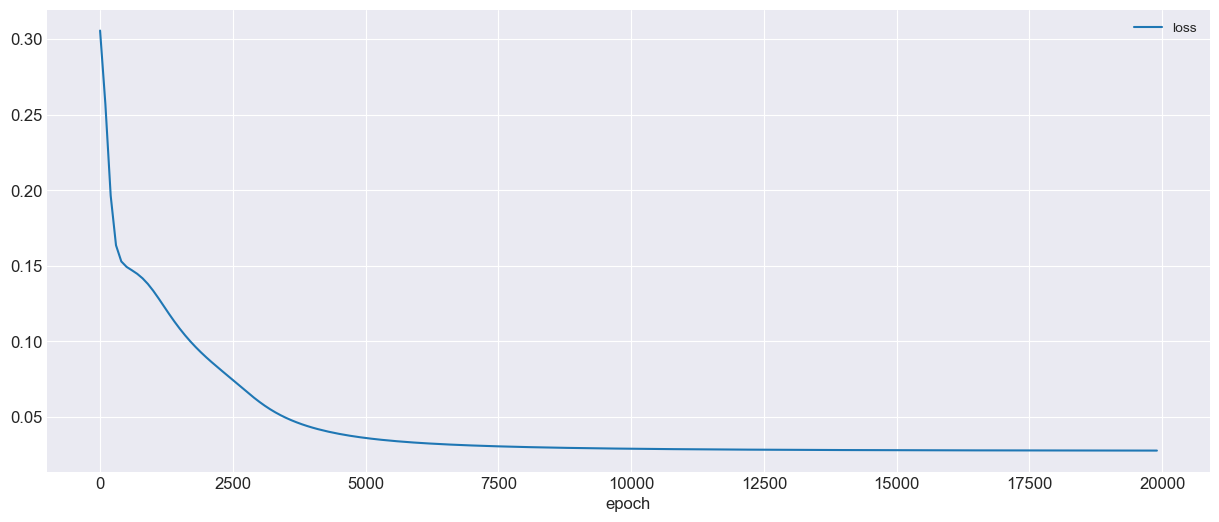

In [38]:
pd.DataFrame(loss_hist).plot(x='epoch', y='loss')

In [39]:
y_pred = predict(model, X_train)

accuracy_score(y_pred=y_pred, y_true=y_train)

0.98125

In [40]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_train)
cm

array([[393,   7],
       [  8, 392]], dtype=int64)

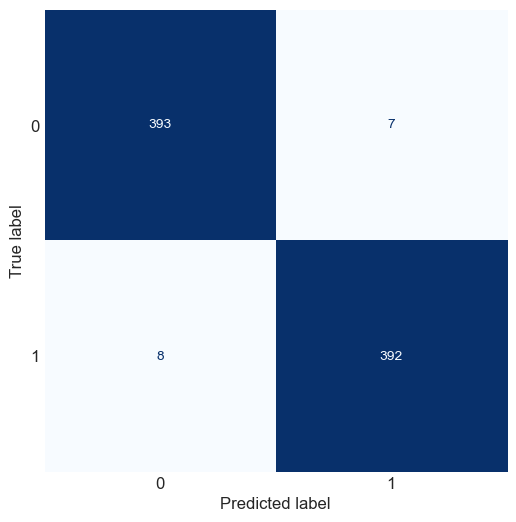

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot(cmap='Blues', colorbar=False)
plt.grid()
plt.show()

In [42]:
# model['W1'].shape, model['W2'].shape, model['b1'].shape, model['b2'].shape

In [43]:
# model['b2']

In [44]:
def predict(row, wts):
    z = wts[0]
    for i in range(len(row)-1):
        z += wts[i+1] * row[i]
    return fn_sigmoid(z)

In [45]:
# def predict(row, wts):
#     z = wts[0]
#     for i in range(len(row)-1):
#         z += wts[i+1] * row[i]
#     return 1 if z >=0 else 0

In [46]:
def train_weights(train, alpha, n_epochs):
    errors = [] # store all errors
    weights = rng.random(train.shape[1])  # weights initialized at random 

    m = train.shape[0]                   # number samples
    for epoch in np.arange(n_epochs):    # looping over all epochs
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)

            dz = prediction - row[-1] #(a-y)
            
            # sum_error += (prediction - row[-1])**2 # mean squared error
            # cross entropy loss = -y.log(a)
            sum_error += -row[-1]*np.log(prediction)
            
            weights[0] = weights[0] - alpha * dz / m # update w0

            for i in range(len(row)-1):
                
                weights[i+1] += -alpha * dz * row[i] / m  # update w1 and w2 
        errors.append(sum_error)
    return weights, errors

In [47]:
weights = rng.random(data_train.shape[1])

NameError: name 'data_train' is not defined

In [ ]:
weights, errors = train_weights(data_train, ALPHA, EPOCHS)

### training data

In [ ]:
data_train

In [ ]:
predictions = []                         # to store predictions

for row in data_train:                   # iterate over rows
    prediction = predict(row, weights)   # make predictions
    pred = 0
    if prediction >= 0.5:  # converting continous values to binary values
        pred = 1
    predictions.append(pred)       # collect in a list 

# calculate accuracy
accuracy_score(y_pred=predictions, y_true=data_train[:, -1])

In [ ]:
cm = confusion_matrix(y_true=data_train[:, -1], y_pred=predictions)
cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues', colorbar=False)
plt.grid()
plt.show()

### testing data

In [ ]:
predictions = []     # to store predictions

for row in data_test:                   # iterate over rows
    prediction = predict(row, weights)  # make predictions
    pred = 0
    if prediction >= 0.5:
        pred = 1
    predictions.append(pred)      # collect in a list

#  calculate accuracy  
print(f'Test accuracy: {accuracy_score(y_pred=predictions, y_true=data_test[:, -1])}')

# calculate confusion matrix
cm = confusion_matrix(y_true=data_test[:, -1], y_pred=predictions)

#plots always look good
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues', colorbar=False)
plt.grid()
plt.show()

In [ ]:
fn_plot_decision_boundary(predict, data_train, weights)

In [ ]:
plt.plot(errors)